# 공공데이터 상권정보 분석해 보기
* https://www.data.go.kr/dataset/15012005/fileData.do
* 국가중점데이터인 상권정보를 살펴봅니다.
* 처음으로 파일데이터에서 상권별 업종밀집통계정보를 다운로드 받아봅니다.

## 필요한 라이브러리 불러오기

In [2]:
# pandas, numpy, seaborn, matplotlib.pyplot
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 시각화를 위한 폰트 설정

In [8]:
# Window 의 한글 폰트 설정
# plt.rc('font',family='Malgun Gothic')
# Mac 의 한글 폰트 설정
plt.rc('font', family='AppleGothic') 
plt.rc('axes', unicode_minus=False)# 마이너스 폰트 깨짐 방지 

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프가 노트북 안에 보이게 하기 위해
%matplotlib inline

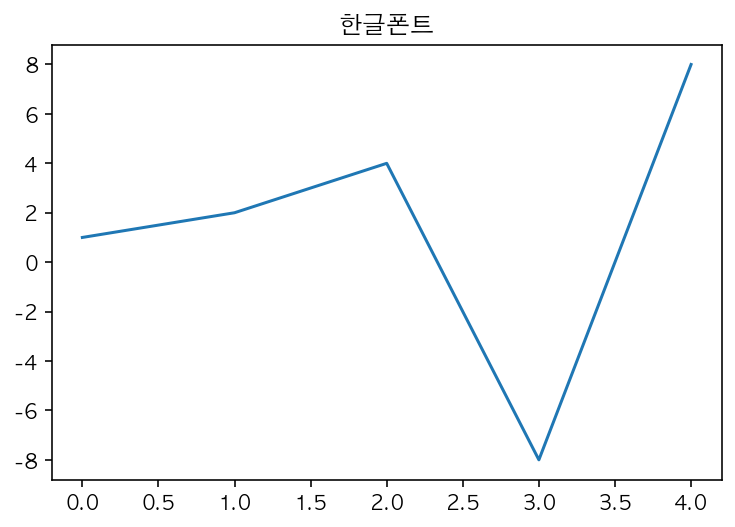

In [9]:
pd.Series([1,2,4,-8,8]).plot(title = "한글폰트")

## Google Colaboratory 사용을 위한 설정

In [0]:
# # 나눔고딕 설치
# !apt -qq -y install fonts-nanum > /dev/null

# import matplotlib.font_manager as fm

# fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
# font = fm.FontProperties(fname=fontpath, size=9)
# fm._rebuild()

# # 그래프에 retina display 적용
# %config InlineBackend.figure_format = 'retina'

# # Colab 의 한글 폰트 설정
# plt.rc('font', family='NanumBarunGothic') 

In [0]:
# # 구글 드라이브에서 csv 파일을 읽어오기 위해 gauth 인증
# !pip install -U -q PyDrive
# from pydrive.auth import GoogleAuth
# from pydrive.drive import GoogleDrive
# from google.colab import auth
# from oauth2client.client import GoogleCredentials

# # PyDrive client 인증
# auth.authenticate_user()
# gauth = GoogleAuth()
# gauth.credentials = GoogleCredentials.get_application_default()
# drive = GoogleDrive(gauth)

In [0]:
# # 공유 가능한 링크로 파일 가져오기
# url = 'https://drive.google.com/open?id=1xvJs9ZxUHoBBAUXq1IWEaRXgcop8KjrT'
# id = url.split('=')[1]
# print(id)
# downloaded = drive.CreateFile({'id':id}) 
# # data 폴더에 파일을 관리하며, 폴더가 없다면 만들어서 파일을 관리하도록 한다.
# %mkdir data
# downloaded.GetContentFile('data/store_201906_01.csv')  

## 데이터 로드하기
* 판다스에서 데이터를 로드할 때는 read_csv를 사용합니다.
* 데이터를 로드해서 df라는 변수에 담습니다.
* 그리고 shape 를 통해 데이터의 갯수를 찍습니다. 결과는 (행, 열) 순으로 출력됩니다.

In [16]:
df = pd.read_csv("DATA/store_201906_01.csv")
df.shape

(565016, 39)

## 데이터 미리보기
* head, tail 을 통해 데이터를 미리 볼 수 있습니다.

In [17]:
# head 로 데이터를 미리보기 합니다.
df.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,19911397,커피빈코리아선릉로93길점,코리아선릉로93길점,Q,음식,Q12,커피점/카페,Q12A01,커피전문점/카페/다방,I56220,...,1168010100106960042022041,NaN,서울특별시 강남구 선릉로93길 6,135080,6149.0,NaN,1,NaN,127.047883,37.505675
1,19911801,프로포즈,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1154510200101620001017748,NaN,서울특별시 금천구 가산로 34-6,153010,8545.0,NaN,1,NaN,126.899220,37.471711
2,19912201,싱싱커피&토스트,NaN,Q,음식,Q07,패스트푸드,Q07A10,토스트전문,I56192,...,2653010400105780000002037,산업용품유통상가,부산광역시 사상구 괘감로 37,617726,46977.0,NaN,1,26,128.980455,35.159774
3,19905471,와라와라호프,NaN,Q,음식,Q09,유흥주점,Q09A01,호프/맥주,I56219,...,1168010600106040000014378,대치상가,서울특별시 강남구 남부순환로 2933,135280,6280.0,NaN,1,NaN,127.061026,37.493922
4,19932756,가락사우나내스낵,NaN,F,생활서비스,F09,대중목욕탕/휴게,F09A02,사우나/증기탕/온천,S96121,...,1171010500102560005010490,NaN,서울특별시 송파구 가락로 71,138846,5690.0,NaN,1,NaN,127.104071,37.500249


In [18]:
# tail 로 마지막 부분에 있는 데이터를 불러옵니다.
df.tail()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
565011,16284103,서동수타짬뽕,NaN,Q,음식,Q02,중식,Q02A00,중국음식/중국집,I56112,...,2641011000102180001013127,NaN,부산광역시 금정구 서동중심로 14,609831,46328.0,NaN,NaN,NaN,129.104354,35.210961
565012,16282701,주방,NaN,Q,음식,Q02,중식,Q02A00,중국음식/중국집,I56112,...,1144012300100570138013520,NaN,서울특별시 마포구 월드컵로19길 42,121820,4012.0,NaN,2,NaN,126.907641,37.555677
565013,16283091,원클래스독서실,NaN,R,학문/교육,R10,도서관/독서실,R10A01,독서실,R90212,...,2626010800112480004011513,월드메디컬타워,부산광역시 동래구 아시아드대로 239-1,607841,47851.0,NaN,2,202,129.067468,35.205469
565014,16287899,에스에스엠,NaN,D,소매,D12,가전제품소매,D12A05,전화기판매,G47312,...,2638010300105220024033909,선경아트빌,부산광역시 사하구 낙동남로1367번길 16,604853,49314.0,NaN,NaN,101,128.961386,35.107213
565015,16286754,천사통신,NaN,D,소매,D12,가전제품소매,D12A05,전화기판매,G47312,...,2614011800100170005012010,NaN,부산광역시 서구 구덕로124번길 27,602055,49246.0,NaN,NaN,NaN,129.022555,35.097951


In [19]:
# info로 데이터의 요약을 봅니다.
# 열의 행길이 다른 것들 확인하고 결집값 확인 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 565016 entries, 0 to 565015
Data columns (total 39 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   상가업소번호     565016 non-null  int64  
 1   상호명        565015 non-null  object 
 2   지점명        75524 non-null   object 
 3   상권업종대분류코드  565016 non-null  object 
 4   상권업종대분류명   565016 non-null  object 
 5   상권업종중분류코드  565016 non-null  object 
 6   상권업종중분류명   565016 non-null  object 
 7   상권업종소분류코드  565016 non-null  object 
 8   상권업종소분류명   565016 non-null  object 
 9   표준산업분류코드   532064 non-null  object 
 10  표준산업분류명    532064 non-null  object 
 11  시도코드       565016 non-null  int64  
 12  시도명        565016 non-null  object 
 13  시군구코드      565016 non-null  int64  
 14  시군구명       565016 non-null  object 
 15  행정동코드      565016 non-null  int64  
 16  행정동명       565016 non-null  object 
 17  법정동코드      565016 non-null  int64  
 18  법정동명       565016 non-null  object 
 19  지번코드       565016 non-n

In [22]:
# 컬럼명만 출력해 봅니다.
df.columns

Index(['상가업소번호', '상호명', '지점명', '상권업종대분류코드', '상권업종대분류명', '상권업종중분류코드',
       '상권업종중분류명', '상권업종소분류코드', '상권업종소분류명', '표준산업분류코드', '표준산업분류명', '시도코드',
       '시도명', '시군구코드', '시군구명', '행정동코드', '행정동명', '법정동코드', '법정동명', '지번코드',
       '대지구분코드', '대지구분명', '지번본번지', '지번부번지', '지번주소', '도로명코드', '도로명', '건물본번지',
       '건물부번지', '건물관리번호', '건물명', '도로명주소', '구우편번호', '신우편번호', '동정보', '층정보',
       '호정보', '경도', '위도'],
      dtype='object')

In [23]:
# value_counts 를 사용하면 카테고리 형태의 데이터 갯수를 세어볼 수 있습니다.
df["상권업종대분류명"].value_counts()

음식          183715
소매          177590
생활서비스        94104
학문/교육        42139
의료           25255
부동산          20460
관광/여가/오락     16283
숙박            5240
스포츠            230
Name: 상권업종대분류명, dtype: int64

In [24]:
# Pandas 에는 plot기능을 내장하고 있습니다. 위에서 분석한 시도코드의 수를 막대그래프로 표현해 봅니다.
df["시도명"].value_counts()

서울특별시    401071
부산광역시    163945
Name: 시도명, dtype: int64

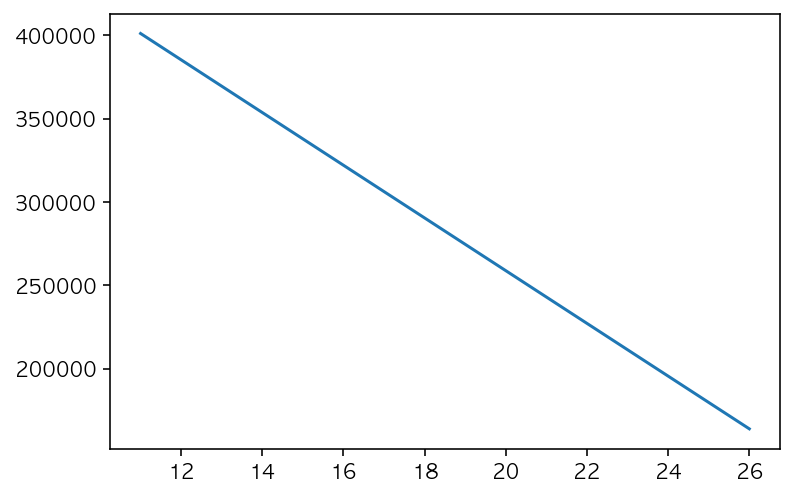

In [26]:
# 위에서는 시도코드로 갯수를 세어봤지만 여기에서는 "시도명" 으로 갯수를 세어봅니다.
df["시도코드"].value_counts().plot()

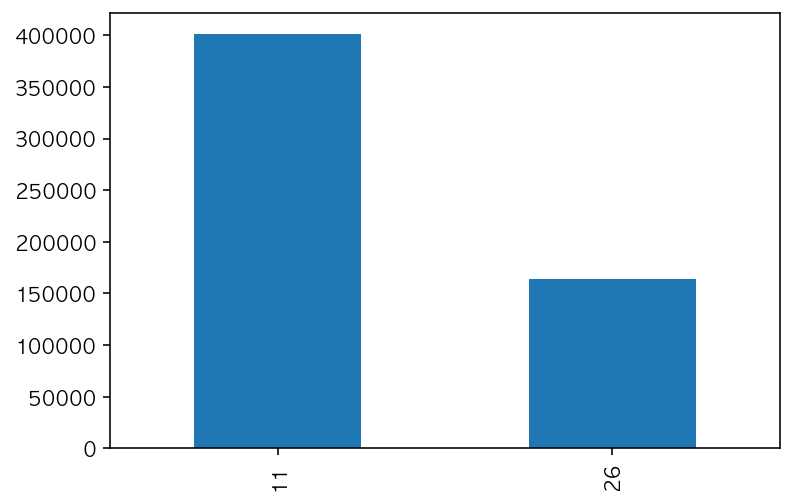

In [27]:
df["시도코드"].value_counts().plot.bar()

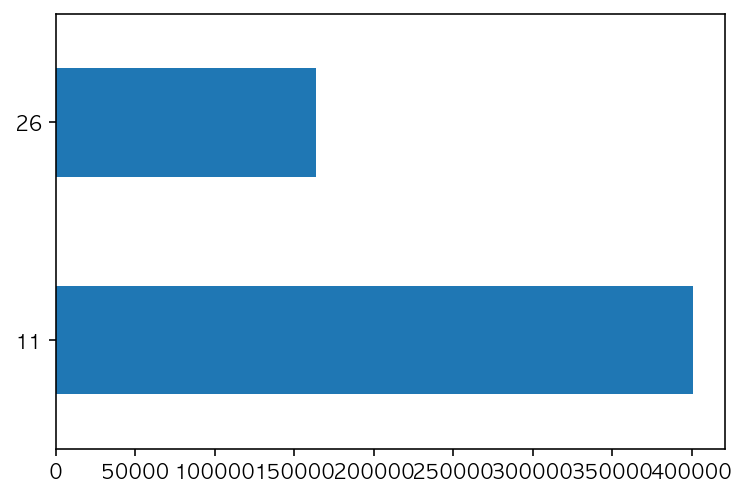

In [28]:
# horizontal bar
df["시도코드"].value_counts().plot.barh()

In [29]:
df["시도코드"].value_counts(normalize = True)*100

11    70.984008
26    29.015992
Name: 시도코드, dtype: float64

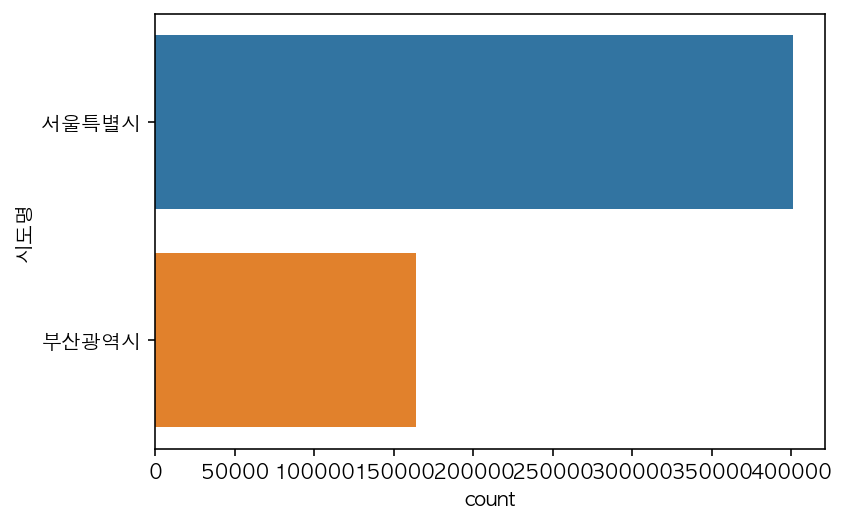

In [31]:
sns.countplot(data = df, y = "시도명")

In [30]:
# "상권업종대분류명"으로 갯수를 세어봅니다.
df["상권업종대분류명"].value_counts()

음식          183715
소매          177590
생활서비스        94104
학문/교육        42139
의료           25255
부동산          20460
관광/여가/오락     16283
숙박            5240
스포츠            230
Name: 상권업종대분류명, dtype: int64

In [36]:
# "상권업종대분류명"이 "의료"인 데이터만 가져와서 df_medical 이라는 변수에 담아봅니다.
# 그리고 head()를 통해 미리보기를 합니다.
df_medical = df[df["상권업종대분류명"] == "의료"]
df_medical.head()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
38,20024149,타워광명내과의원,NaN,S,의료,S01,병원,S01B07,내과/외과,Q86201,...,1168011800104670014000001,NaN,서울특별시 강남구 언주로30길 39,135270,6292.0,NaN,4,NaN,127.053198,37.488742
52,20350610,한귀원정신과의원,NaN,S,의료,S01,병원,S01B99,기타병원,NaN,...,2650010400100740001009932,NaN,부산광역시 수영구 수영로 688,613100,48266.0,NaN,5,NaN,129.115438,35.166872
71,20808534,코원성형외과,NaN,S,의료,S01,병원,S01B08,정형/성형외과,Q86201,...,1168010700105920004010990,이가빌딩,서울특별시 강남구 논현로 826,135893,6025.0,NaN,4,NaN,127.028531,37.522223
102,20755460,헬로스마일소아과,NaN,S,의료,S01,병원,S01B11,소아과,Q86201,...,1168010800100390018000001,성도빌딩,서울특별시 강남구 논현로131길 30,135010,6045.0,NaN,3,NaN,127.027878,37.514144
141,21128898,다사랑요양병원,NaN,S,의료,S01,병원,S01B17,노인/치매병원,Q86102,...,2632010300101360002000001,다사랑요양병원,부산광역시 북구 덕천로 339,616110,46610.0,NaN,1,NaN,129.040773,35.209154


In [37]:
# describe 를 사용하면 데이터를 요약해 볼 수 있습니다.
# 기본적으로 수치형 데이터를 요약해서 보여줍니다.
# 데이터의 갯수, 평균, 표준편차, 최솟값, 1사분위수(25%), 2사분위수(50%), 3사분위수(75%), 최댓값을 볼 수 있습니다.
df_medical.describe()

,상가업소번호,시도코드,시군구코드,행정동코드,법정동코드,지번코드,대지구분코드,지번본번지,지번부번지,도로명코드,건물본번지,건물부번지,구우편번호,신우편번호,경도,위도
count,2.525500e+04,25255.000000,25255.000000,2.525500e+04,2.525500e+04,2.525500e+04,25255.000000,25255.000000,20631.000000,2.525500e+04,25255.000000,2046.000000,25255.000000,25255.000000,25255.000000,25255.000000
mean,2.129123e+07,14.818452,15254.516333,1.525512e+09,1.525463e+09,1.525465e+18,1.000990,501.313839,25.028889,1.525484e+11,246.227321,5.094819,257480.891705,16006.177470,127.529230,36.939129
std,5.031385e+06,6.534363,6483.258644,6.483248e+08,6.483259e+08,6.483262e+17,0.031448,481.924234,77.437906,6.483251e+10,360.361702,8.438925,206718.528995,18674.441964,0.902615,1.037501
min,2.901108e+06,11.000000,11110.000000,1.111052e+09,1.111010e+09,1.111010e+18,1.000000,1.000000,1.000000,1.111020e+11,0.000000,1.000000,100011.000000,1000.000000,126.796353,35.048207
25%,1.624967e+07,11.000000,11350.000000,1.135062e+09,1.135010e+09,1.135011e+18,1.000000,120.000000,3.000000,1.135031e+11,31.000000,1.000000,135010.000000,4310.500000,126.981076,35.272877
50%,2.237058e+07,11.000000,11650.000000,1.165052e+09,1.165010e+09,1.165010e+18,1.000000,379.000000,8.000000,1.165020e+11,115.000000,1.000000,139200.000000,6223.000000,127.041290,37.514609
75%,2.486301e+07,26.000000,26110.000000,2.611054e+09,2.611012e+09,2.611012e+18,1.000000,724.000000,19.000000,2.611031e+11,317.000000,6.000000,600082.000000,46058.000000,128.960160,37.561322
max,2.852393e+07,26.000000,26710.000000,2.671033e+09,2.671033e+09,2.671033e+18,2.000000,4933.000000,1401.000000,2.671042e+11,2947.000000,100.000000,619963.000000,49525.000000,129.282768,37.687105


In [38]:
# 두 컬럼 이상 지정할 때는 꼭 리스트 형태로 
df_medical[["위도","경도"]].describe()

,위도,경도
count,25255.000000,25255.000000
mean,36.939129,127.529230
std,1.037501,0.902615
min,35.048207,126.796353
25%,35.272877,126.981076
50%,37.514609,127.041290
75%,37.561322,128.960160
max,37.687105,129.282768


In [41]:
# 카페정보를 가져오기 위해 "상권업종대분류명" 에서 "음식"만 가져옵니다.
# df.loc를 사용하면 행,열을 함께 가져올 수 있습니다.
# 이 기능을 통해 "상권업종중분류명" 만 가져옵니다. 
# 그리고 가져온 결과를 value_counts 를 통해 중분류의 갯수를 세어봅니다.
df_food = df[df["상권업종대분류명"] == "음식"]
df_food.shape

(183715, 39)

In [43]:
df_food["상권업종대분류명"].value_counts()

음식    183715
Name: 상권업종대분류명, dtype: int64

In [44]:
# 위와 똑같은 기능을 수행하는 코드입니다. 아래와 같이 한 줄에 표현할 수도 있습니다. 
df.loc[df["상권업종대분류명"] == "음식", "상권업종중분류명"].value_counts()

한식         59256
유흥주점       23876
커피점/카페     23513
분식         17338
일식/수산물     15024
닭/오리요리     10318
양식          9590
패스트푸드       7531
제과제빵떡케익     7227
중식          4887
별식/퓨전요리     3878
부페           631
기타음식업        499
음식배달서비스      147
Name: 상권업종중분류명, dtype: int64

In [47]:
# 커피점/카페만 따로 모아봅니다.
df_cafe = df_food[df_food["상권업종중분류명"]=="커피점/카페"]
df_cafe.shape

(23513, 39)

In [51]:
# 상호명으로 갯수를 세어봅니다. 
# 가장 많은 상호 상위 10개를 출력해 봅니다.
df_cafe["상호명"].value_counts().head(10)

간단하지만특별한화피디Cafe    1482
이디야커피               538
스타벅스                370
투썸플레이스              165
커피빈                 153
엔제리너스               134
할리스커피               124
카페베네                110
탐앤탐스                109
커피베이                104
Name: 상호명, dtype: int64

In [57]:
# 서울에 있는 카페의 위도와 경도를 봅니다.
df_cafe_seoul = df_cafe[df_cafe["시도명"] == "서울특별시"]
df_cafe_seoul.shape

(18651, 39)

In [64]:
df_cafe_seoul[["위도", "경도"]].describe()

,위도,경도
count,18651.000000,18651.000000
mean,37.541911,126.993093
std,0.045397,0.077060
min,37.434157,126.797102
25%,37.504827,126.928029
50%,37.539471,127.003132
75%,37.568276,127.049454
max,37.689203,127.176066


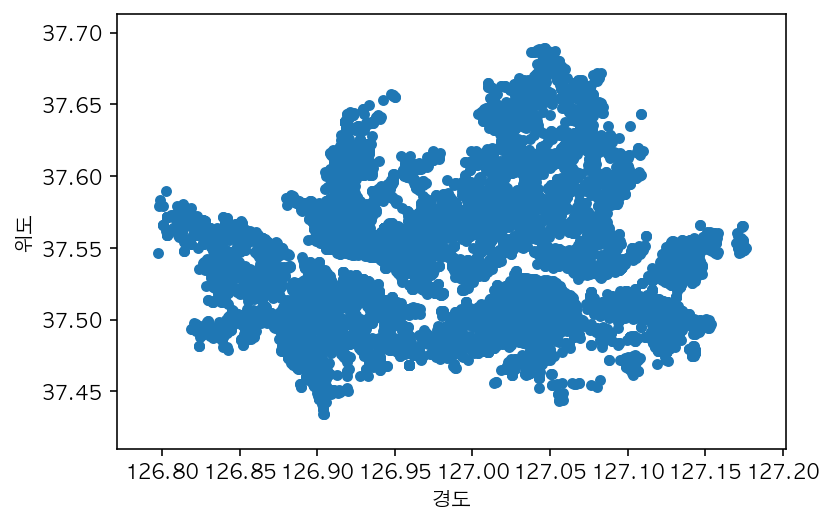

In [65]:
# Pandas 의 plot.scatter 를 통해 경도와 위도를 표시해 봅니다.
df_cafe_seoul[["위도", "경도"]].plot.scatter(x = "경도", y = "위도")

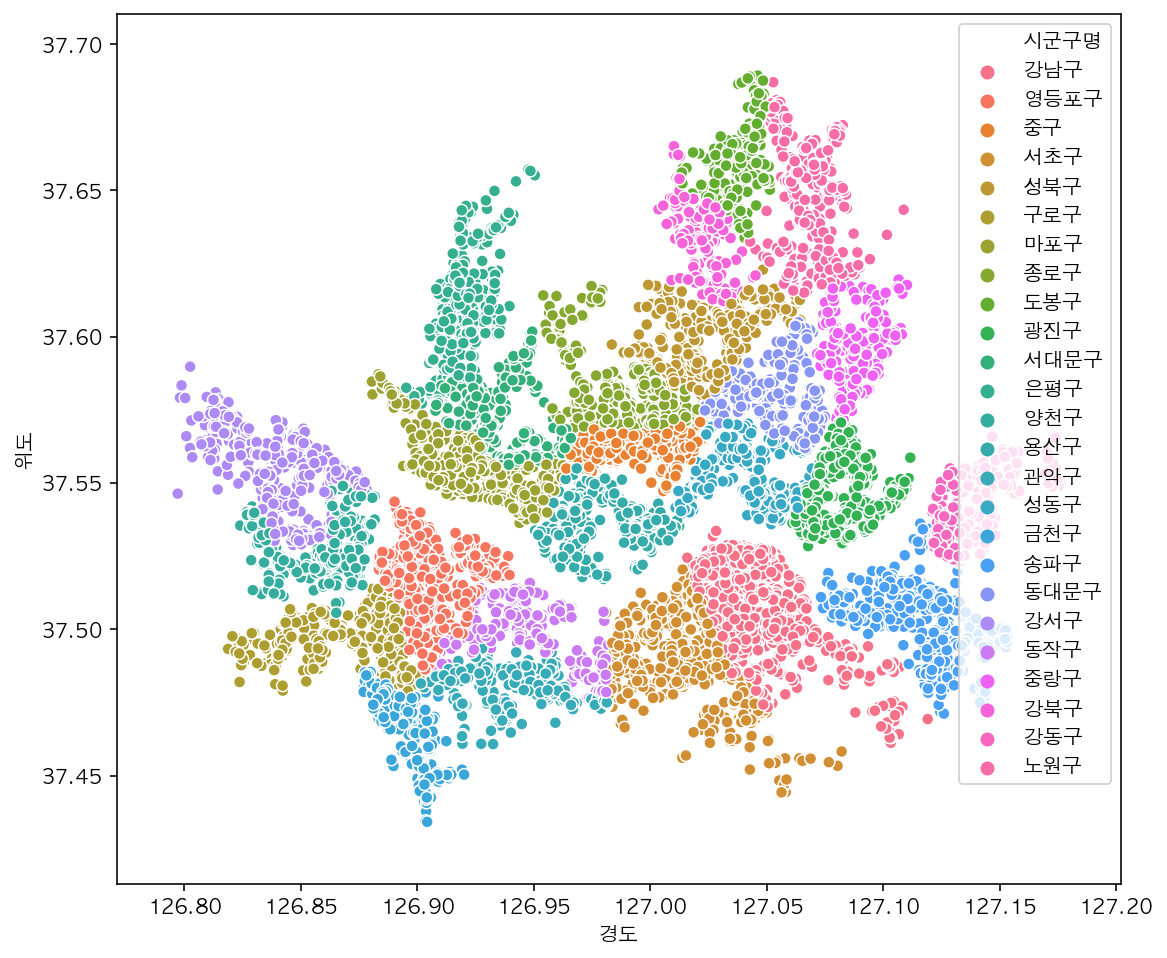

In [67]:
# seaborn의 scatterplot 을 통해 구별 경도와 위도를 표시해 봅니다.
plt.figure(figsize = (9,8))
sns.scatterplot(data = df_cafe_seoul, x = "경도", y = "위도", hue = "시군구명")


In [69]:
# 결측치 수 구하기 

df.isnull()

,상가업소번호,상호명,지점명,상권업종대분류코드,상권업종대분류명,상권업종중분류코드,상권업종중분류명,상권업종소분류코드,상권업종소분류명,표준산업분류코드,...,건물관리번호,건물명,도로명주소,구우편번호,신우편번호,동정보,층정보,호정보,경도,위도
0,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
1,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
2,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,True,False,False
4,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565011,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,True,True,False,False
565012,False,False,True,False,False,False,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False
565013,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
565014,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,True,True,False,False,False


In [71]:
null_count = df.isnull().sum()
null_count

상가업소번호            0
상호명               1
지점명          489492
상권업종대분류코드         0
상권업종대분류명          0
상권업종중분류코드         0
상권업종중분류명          0
상권업종소분류코드         0
상권업종소분류명          0
표준산업분류코드      32952
표준산업분류명       32952
시도코드              0
시도명               0
시군구코드             0
시군구명              0
행정동코드             0
행정동명              0
법정동코드             0
법정동명              0
지번코드              0
대지구분코드            0
대지구분명             0
지번본번지             0
지번부번지         97123
지번주소              0
도로명코드             0
도로명               0
건물본번지             0
건물부번지        494164
건물관리번호            0
건물명          303808
도로명주소             0
구우편번호             0
신우편번호             9
동정보          514802
층정보          220463
호정보          481880
경도                0
위도                0
dtype: int64

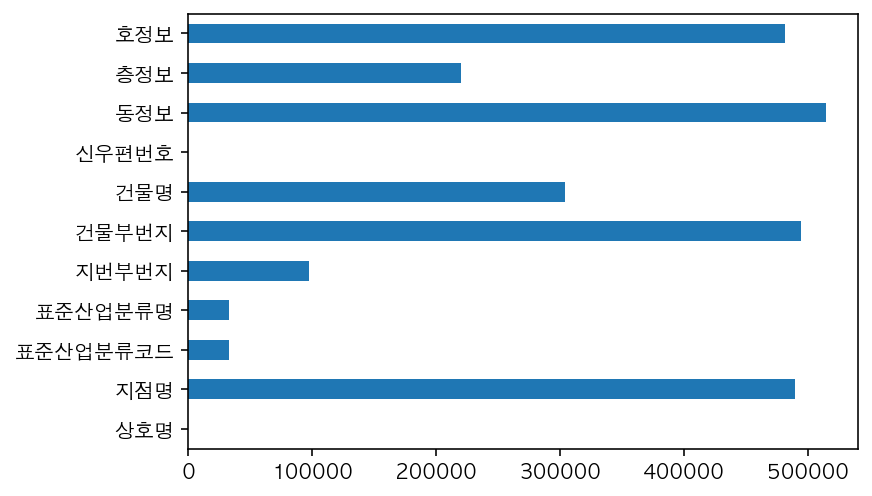

In [72]:
null_count[null_count > 0].plot.barh() 